Based on the blog post https://www.earlevel.com/main/2017/05/26/guitar-amp-simulation/

In [49]:
import numpy as np
import librosa
from librosa.display import specshow
from matplotlib import pyplot as plt
from IPython.display import Audio

In [74]:
fs = 44100

x, _ = librosa.load('clean.wav', sr=44100)

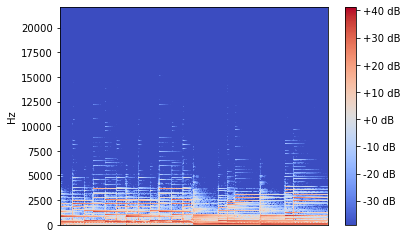

In [69]:
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(x))),
                        y_axis='linear',
                        sr=fs)
plt.colorbar(format='%+2.0f dB')

In [77]:
gain = 10.0

y = gain * x

def tube(x, sat=1.0, clipping='hard'):
    x[x > sat] = sat
    x[x < -sat] = -sat
    if clipping == 'soft':
        idx_not_clipped = (x > -sat) & (x < sat)
        x[idx_not_clipped] *= 2 - np.abs(x[idx_not_clipped])
    return x
        
y_hard_clipped = tube(y)
y_soft_clipped = tube(y, clipping='soft')


def amp(x, gain=1.0, clipping='hard'):
    return tube(gain * x, clipping=clipping)

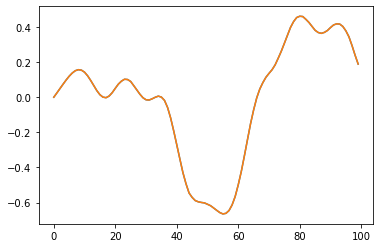

In [78]:
plt.plot(y_hard_clipped[:100])
plt.plot(y_soft_clipped[:100])

In [79]:
Audio(y_hard_clipped, rate=fs)

In [80]:
Audio(y_soft_clipped, rate=fs)

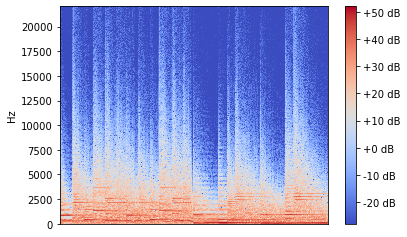

In [81]:
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y_hard_clipped))),
                        y_axis='linear',
                        sr=fs)
plt.colorbar(format='%+2.0f dB')

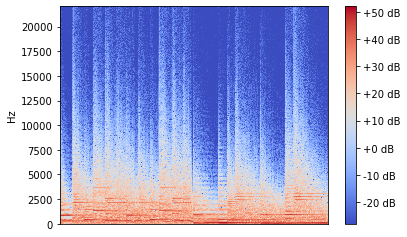

In [82]:
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y_soft_clipped))),
                        y_axis='linear',
                        sr=fs)
plt.colorbar(format='%+2.0f dB')

In [83]:
import soundfile

soundfile.write('hard_clipping.wav', y_hard_clipped, fs)
soundfile.write('soft_clipping.wav', y_soft_clipped, fs)

1.0